In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amzn-dpz-btc-ntfx-adjusted-may-2013may2019/portfolio_data.csv


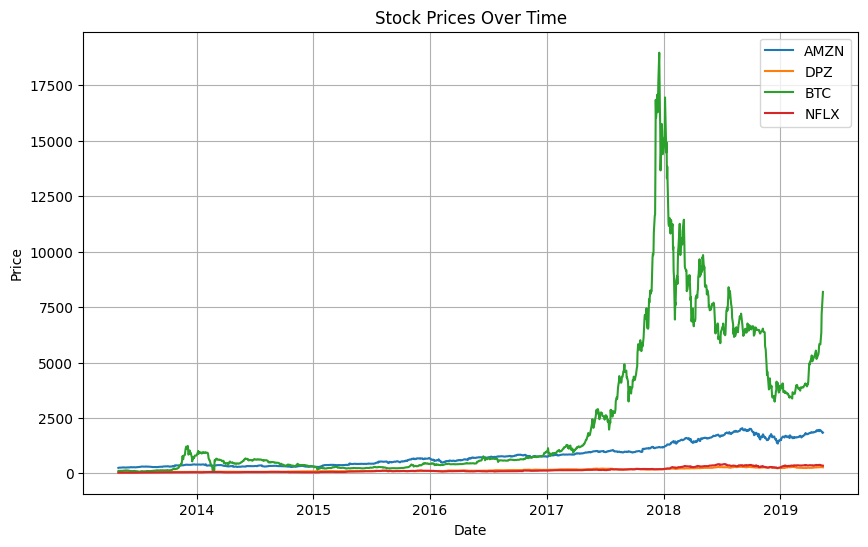

Basic Statistics:
              AMZN          DPZ           BTC         NFLX
count  1520.000000  1520.000000   1520.000000  1520.000000
mean    821.541810   146.771695   2421.465669   147.668273
std     518.442653    72.192287   3310.894199   107.641486
min     248.229996    51.190983     69.660004    29.464285
25%     364.360001    84.993593    340.904999    62.851071
50%     686.459992   127.168053    625.304993   104.000000
75%    1121.287536   202.454994   3874.912415   192.207496
max    2039.510010   298.635986  18972.320310   418.970001


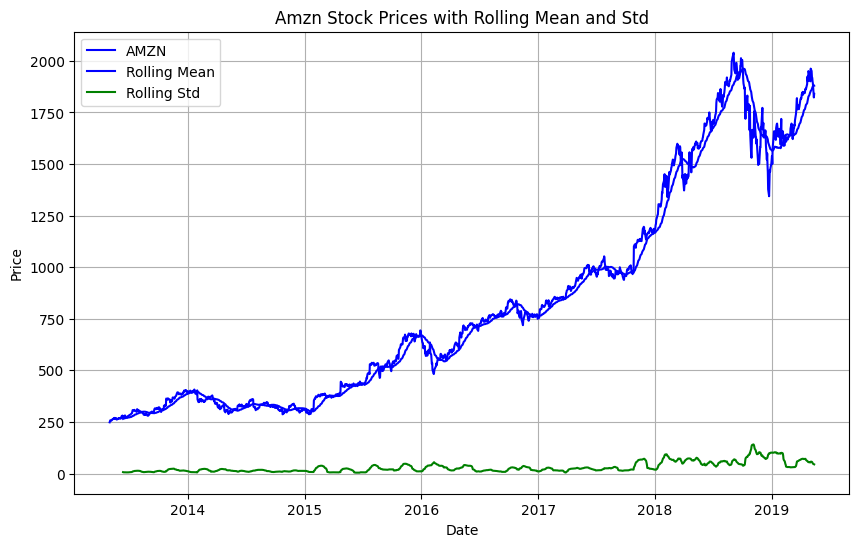

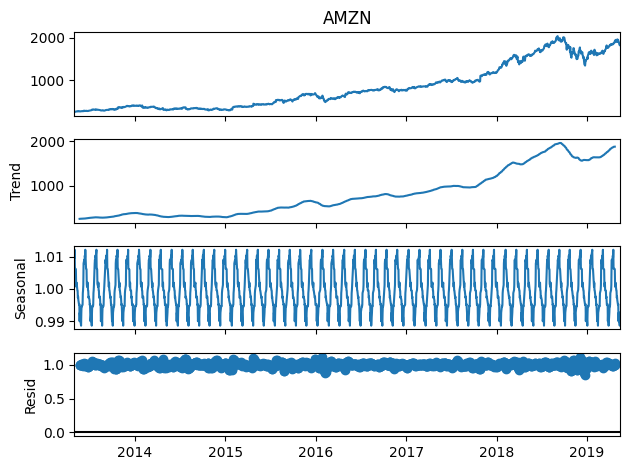

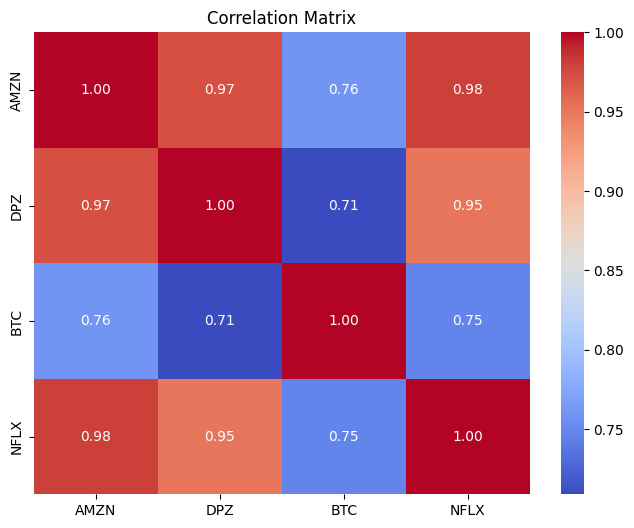

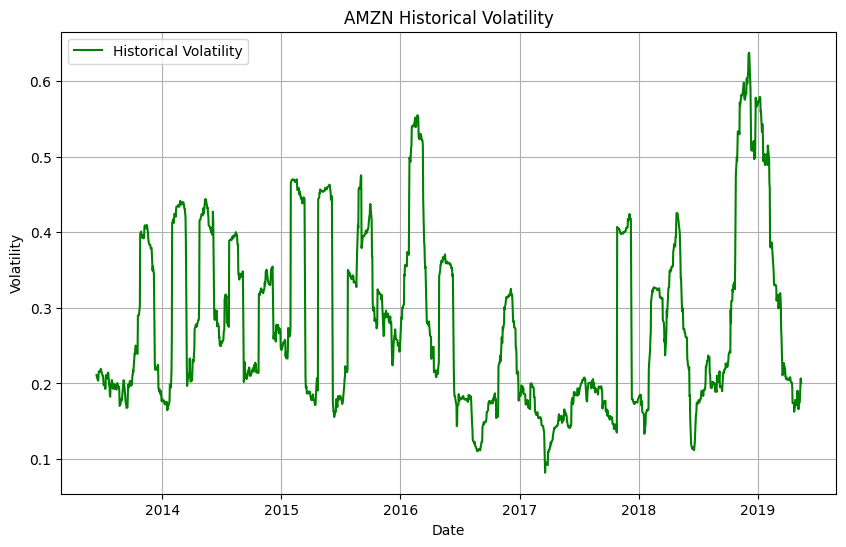

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/p

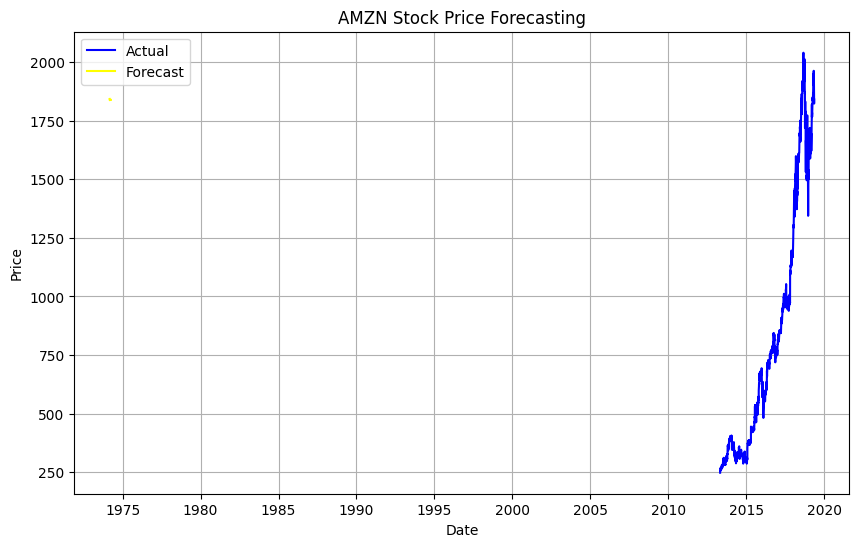

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

df = pd.read_csv('/kaggle/input/amzn-dpz-btc-ntfx-adjusted-may-2013may2019/portfolio_data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Exploratory Data Analysis
plt.figure(figsize=(10, 6))
for column in df.columns:
    plt.plot(df[column], label=column)
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

#plot basic statistics
statistics = df.describe()
print("Basic Statistics:")
print(statistics)

# Calculate and plot rolling mean and standard deviation
rolling_mean = df.rolling(window=30).mean()
rolling_std = df.rolling(window=30).std()

plt.figure(figsize=(10, 6))
plt.plot(df['AMZN'], label='AMZN', color='blue')
plt.plot(rolling_mean['AMZN'], label='Rolling Mean', color='blue')
plt.plot(rolling_std['AMZN'], label='Rolling Std', color='green')
plt.title('Amzn Stock Prices with Rolling Mean and Std')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Seasonality Analysis
seasonal_decomposition = seasonal_decompose(df['AMZN'], model='multiplicative', period=30)
seasonal_decomposition.plot()
plt.show()

# Correlation Analysis
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Volatility Analysis
historical_volatility = df.pct_change().rolling(window=30).std() * (252 ** 0.5)
plt.figure(figsize=(10, 6))
plt.plot(historical_volatility['AMZN'], label='Historical Volatility', color='green')
plt.title('AMZN Historical Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()

# Time Series Forecasting for 30 days
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(df['AMZN'], order=(5,1,0))
results = model.fit()

# Forecast next 30 days
forecast_steps = 30
forecast = results.forecast(steps=forecast_steps)

plt.figure(figsize=(10, 6))
plt.plot(df['AMZN'], label='Actual', color='blue')
plt.plot(forecast, label='Forecast', color='yellow')
plt.title('AMZN Stock Price Forecasting')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()